<a href="https://colab.research.google.com/github/lucatraverso/predict-future-sales/blob/main/Predict_future_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict Future Sales - Data Science Fundamentals - Homework 2

In this colab I will be working on the [Predict Future Sales](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/) dataset from Kaggle as a part of the [Steven Skiena Data Science Fundamentals](https://www.youtube.com/playlist?list=PLOtl7M3yp-DVODzTKX8JtXkm1EG3u2BsD/) course. You can find the assignment [here](https://docs.google.com/document/d/1T6YSc5Iy5Bg7giua8UjWgj222nLAwpKFg1ZLVtrFDVg/).


In [1]:
ziped_dataset = '/content/drive/MyDrive/ML_Projects/predict_future_sales/competitive-data-science-predict-future-sales.zip'
from zipfile import ZipFile
ZipFile(ziped_dataset).extractall()

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##Data gathering

The data was provided by a Russian software company and contains sales data of several categories and shops by day.

Lets take a look at the data, see whats need to be fixed and try to combine the dataframes.

In [68]:
#Reading files
categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
sales = pd.read_csv('sales_train.csv')
shops = pd.read_csv('shops.csv')
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')

In [4]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [5]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [6]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


I downloaded and translated the Rusian columns to English. Now, we can use the 'sales' dataframe as a base and add the shop name, item name and category name and id.

In [8]:
#Importing translated categories
item_category_name_en = pd.read_excel('/content/drive/MyDrive/ML_Projects/predict_future_sales/item_category_name_en.xlsx').convert_dtypes()
item_name_en = pd.read_excel('/content/drive/MyDrive/ML_Projects/predict_future_sales/item_name_en.xlsx').convert_dtypes()
shop_name_en = pd.read_excel('/content/drive/MyDrive/ML_Projects/predict_future_sales/shop_name_en.xlsx').convert_dtypes()

categories_en = pd.concat([categories, item_category_name_en], axis=1)
items_en = pd.concat([items, item_name_en], axis=1)
shops_en = pd.concat([shops, shop_name_en], axis=1)

In [9]:
#Merge 4 dataframes into one
data = sales.merge(shops_en, how='left', on='shop_id')
data = data.merge(items_en, how='left', on='item_id')
data = data.merge(categories_en, how='left', on='item_category_id')

#Modify date format
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')

#Add a column corresponding the price * items count
data['income'] = data['item_cnt_day']*data['item_price']

#Change the index to a multi-level index with dates.
mindex = pd.MultiIndex.from_arrays([data.date.dt.year, data.date.dt.month, data.date.dt.dayofweek], names=['Year', 'Month', 'Day'])
data = data.set_index(mindex)
data.head(3)

date  date_block_num  ...  item_category_name_en  income
Year Month Day                             ...                               
2013 1     2   2013-01-02               0  ...       Cinema - Blu-Ray   999.0
           3   2013-01-03               0  ...          Music - Vinyl   899.0
           5   2013-01-05               0  ...          Music - Vinyl  -899.0

[3 rows x 14 columns]

##Analyzing sales by day and month

Text(0.5, 1.0, 'Total sales by day of the week')

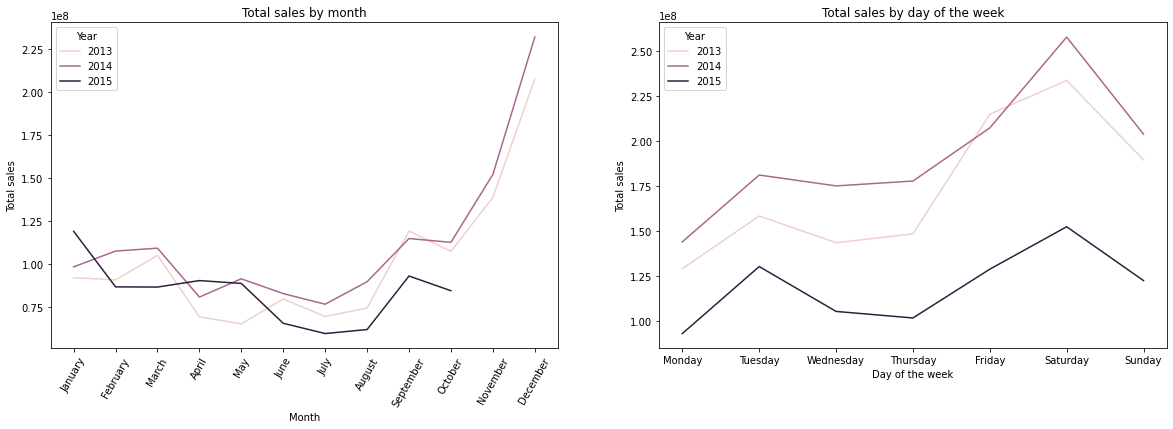

In [10]:
#Plotting
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.lineplot(x='Month', y='income', data=data.groupby(['Year', 'Month']).sum(), hue='Year', ax=ax[0])
ax[0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[0].set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=60)
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Total sales')
ax[0].set_title('Total sales by month')

sns.lineplot(x='Day', y="income", data=data.groupby(['Year', 'Day']).sum(), hue='Year', ax=ax[1])
ax[1].set_xticks([0, 1, 2, 3, 4, 5, 6])
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax[1].set_xlabel('Day of the week')
ax[1].set_ylabel('Total sales')
ax[1].set_title('Total sales by day of the week')

First of all, let's remeber that there is not information about the last two months of 2015. 

The month with more sales is December, probably because of Christmas. The weekend is the period with more activity.

##Sales by category

Analysis of what categories are the most popular in Russia. The following plots show the total sales by category, then the sales by day for the most popular item and shop.

(-1.0, 85.0)

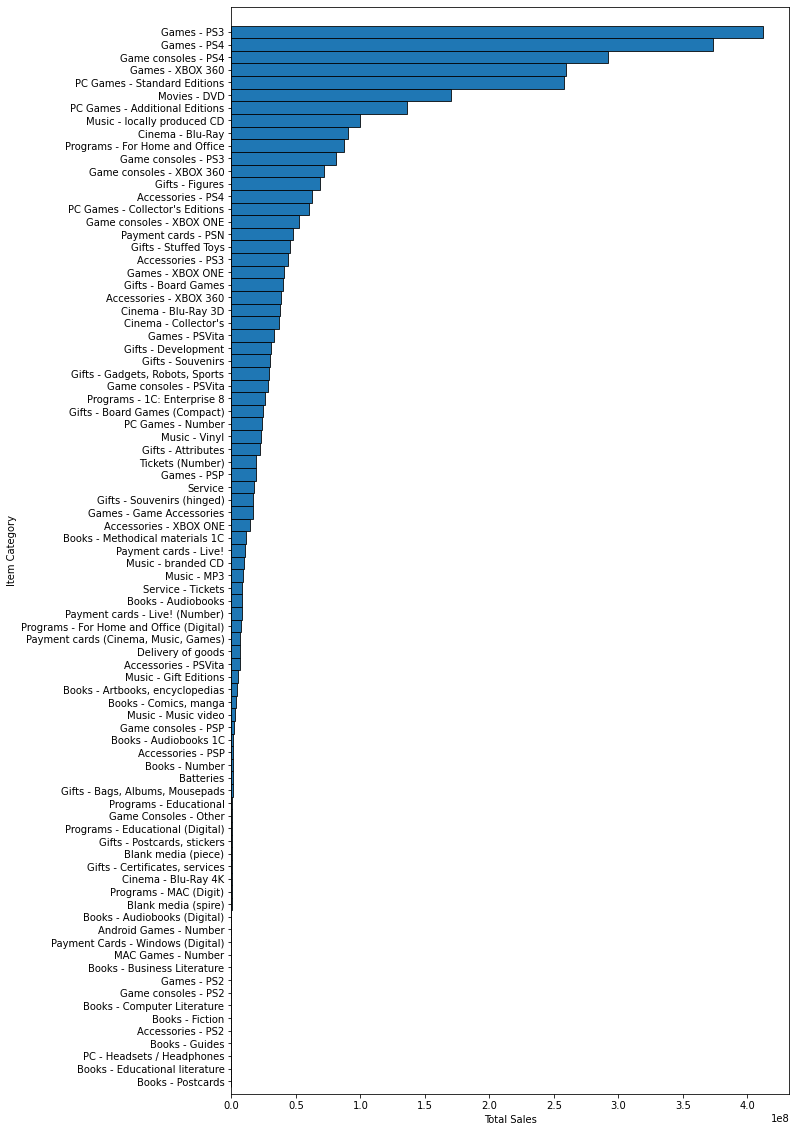

In [11]:
#Adding income by category
sales_by_cat = data.groupby(by='item_category_name_en').sum().sort_values(by='income')
plt.figure(figsize=(10,20))
plt.barh(sales_by_cat.index, 
        sales_by_cat['income'], 
        height=1, 
        edgecolor='k', 
        linewidth=0.8)
plt.xlabel('Total Sales')
plt.ylabel('Item Category')
plt.ylim(-1, 85)


Looks like PlayStation is far ahead Xbox in Russia. Let's see sales by day for the most popular category and shop.

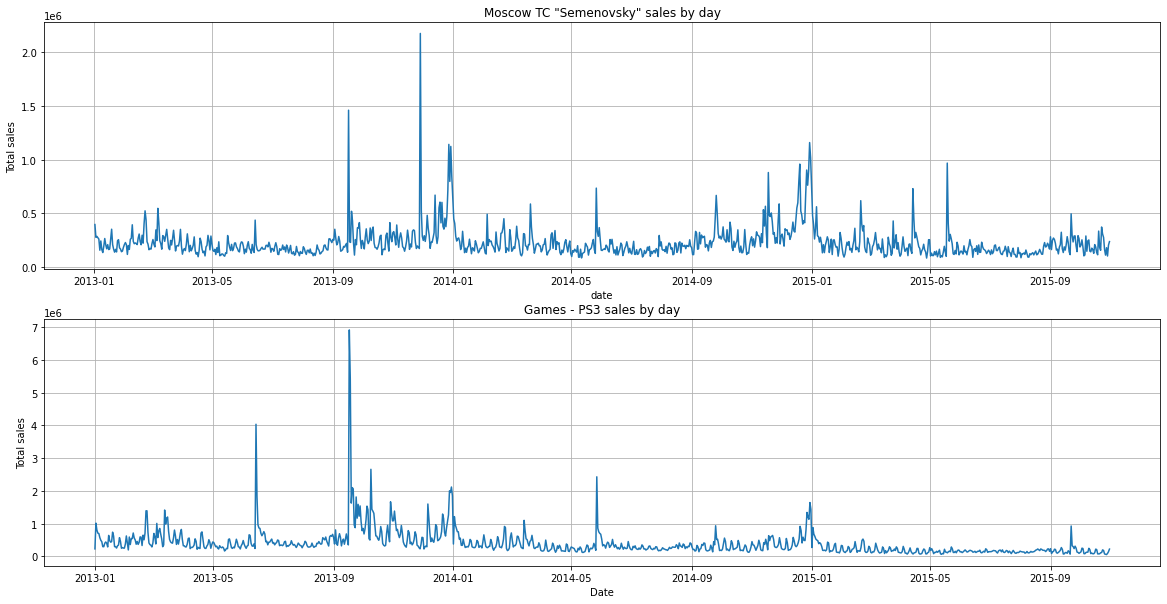

In [12]:
#Obtaining shop and item category with most sales
shop_max = data.groupby(by='shop_name_en').sum().sort_values(by='income', ascending=False).iloc[0].name
cat_max = data.groupby(by='item_category_name_en').sum().sort_values(by='income', ascending=False).iloc[0].name

fig, ax = plt.subplots(2, 1, figsize=(20, 10))

sns.lineplot(x='date', y='income', data=data[data['shop_name_en'] == shop_max].groupby(by='date').sum(), ax=ax[0])
ax[0].set_ylabel('Total sales')
ax[0].set_title(f'{shop_max} sales by day')
ax[0].grid()

sns.lineplot(x='date', y='income', data=data[data['item_category_name_en'] == cat_max].groupby(by='date').sum(), ax=ax[1])
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Total sales')
ax[1].set_title(f'{cat_max} sales by day')
ax[1].grid()

##Item price vs Items sold

The next graph shows item price and items sold over time.

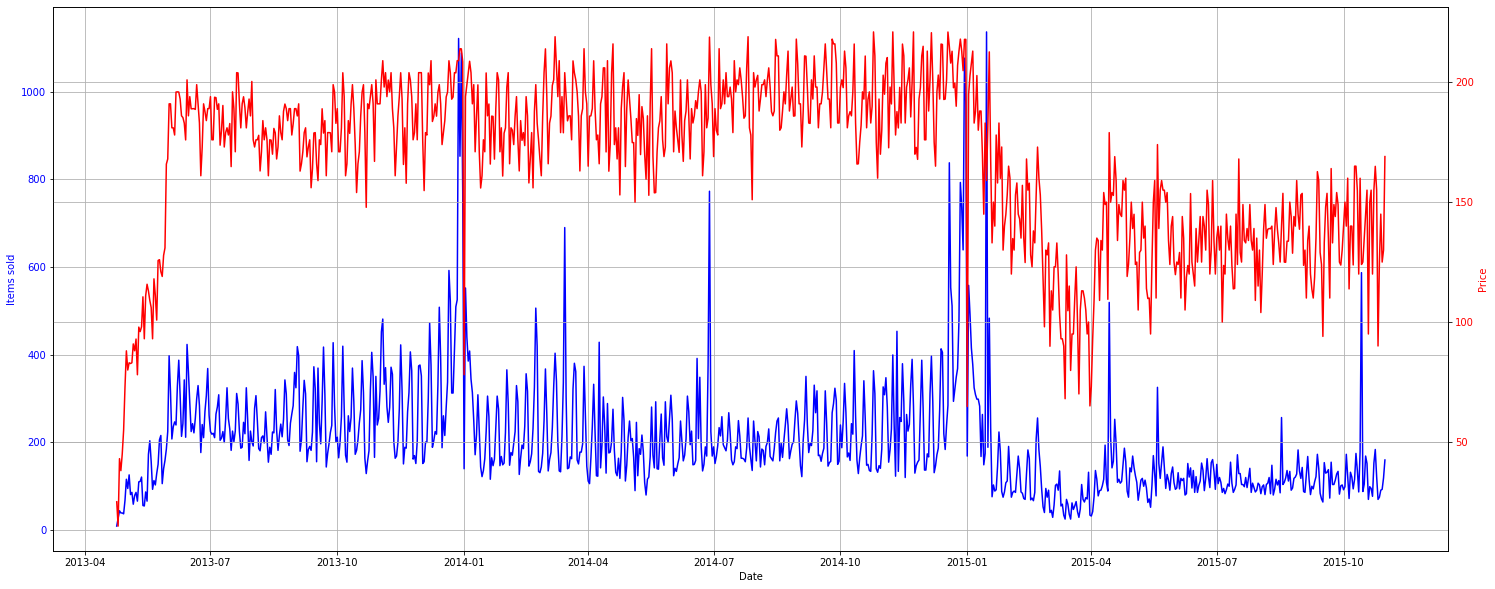

In [13]:
#Plotting item sales and price with the same x axis
item = data.groupby(by='item_name_en').sum().sort_values(by='item_cnt_day', ascending=False).iloc[0].name

df = data[data['item_name_en'] == item].groupby(by='date').sum()
x = df.index
y1 = df.item_cnt_day
y2 = df.item_price

fig1, ax1 = plt.subplots(figsize=(25, 10))
ax1.set_xlabel('Date')
ax1.set_ylabel('Items sold', color='b')
ax1.plot(x, y1, color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid()

ax2 = ax1.twinx()

ax2.set_ylabel('Price', color='r')
ax2.plot(x, y2, color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid()

plt.show()


In [16]:
#Calculating Pearson correlation and p-value
from scipy.stats import pearsonr as corr
pval = corr(y1, y2)
print(f'Correlation = {pval[0]} \nP-value = {pval[1]} ')

Correlation = 0.6271633963594418 
P-value = 7.717036291791657e-102 


The Pearson Correlation is equal to 0.62 and the P value is infinitesimal, witch gives credibility to the result.


##Punto 6

The following section analyzes the time between the item was released for the fist time and then sold in other shops and it relation with sales.

In [ ]:
dic = {}
def num_days(data, item):
  '''
  Calculates the number of days between the item was sold for the first time in one shop and other shops
  '''
  #Filter data for a particualr item
  df = data[data.item_id == item]
  if df.empty: 
    return None
  #Obtain the date of the first time the item was sold and the shop id
  first_time_sold = df.sort_values(by='date').iloc[0].date
  first_shop = df.sort_values(by='date').iloc[0].shop_id

  #Remove from de dataset all the entrys corresponding to the first shop to sell the item
  df = df[df.shop_id != first_shop]

  #First time the item was sold in a different shop than the first
  if df.empty:
    return first_time_sold - first_time_sold
  else: 
    second_time = df.sort_values(by='date').iloc[0].date
  return second_time - first_time_sold

dic = {}
for item in items.item_id:
  time_elapsed = num_days(data, item)
  if time_elapsed != None:
    dic[item] = time_elapsed
  
x = []
y = []
for key in dic.keys():
  total_sales = data[data.item_id == key]['income'].sum()
  x.append(dic[key].days)
  y.append(total_sales)

(0.0, 250000.0)

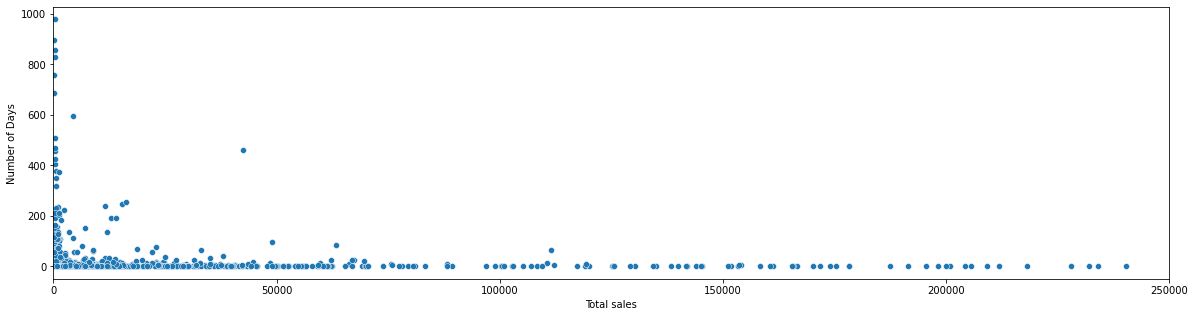

In [128]:
fig, ax = plt.subplots(figsize=(20,5))
sns.scatterplot(x=y, y=x, ax=ax)

ax.set_xlabel('Total sales')
ax.set_ylabel('Number of Days')
ax.set_xlim(0,250000)

The graph does not show that the number of  days between the item was released and sold in other shops has a direct impact on the item sales 